## COMPARING SOME FUNDAMENTAL REGRESSION METHODS ON ADMISSION PREDICTION DATA AND DEPLOYING ML MODEL TO IBM CLOUD

There are lots of regression methods to predict data such as Linear Regression, Decision Tree Regression and so on. In this notebook, we will try to predict the "Chance of Admit" data by using some of fundamental regression methods, which are Linear Regression, Multiple Linear Regression, Decision Tree Regression and Random Forest Regression.

## Importing the required libraries


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Preparing the dataset

In [40]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<Your IBM Cloud API Key>',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'uaepmodeldeployment-donotdelete-pr-zuu1mvtpg1ntno'
object_key = 'Admission_Predict_Ver1.1.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df = df.iloc[:,1:]
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Creating a correlation matrix


In [41]:
corr_matrix = df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


When looking at the data and correlation matrix, it seems that "Chance of Admit" values depend on lots of variables. To observe the effects of columns on "Chance of Admit" values in detail, so creating a correlation graph.

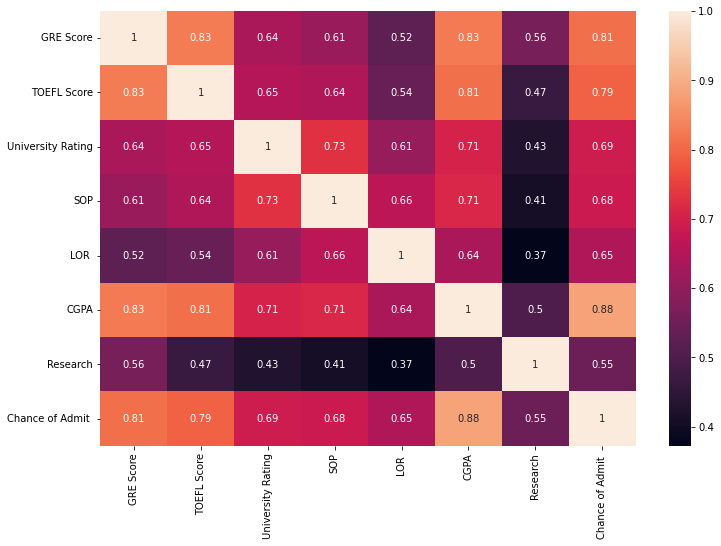

In [42]:
#plotting the correlation matrix as a heatmap

fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

As seen, there are direct proportions between "Chance of Admit" data and the other columns. In order to observe these direct proportions more clearly, we will visualize the data.

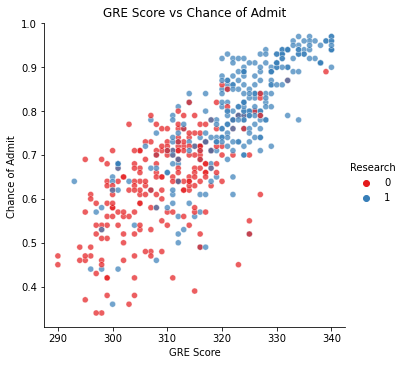

In [43]:
#plotting data which have high correlation

sns.relplot(data=df,x="GRE Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7)
plt.title("GRE Score vs Chance of Admit")
plt.show()

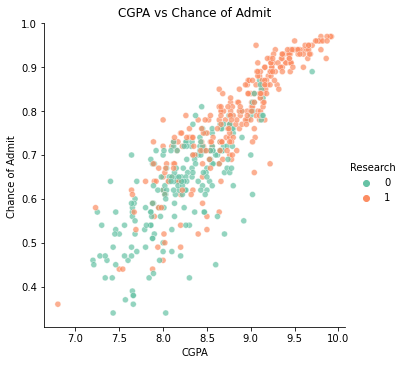

In [44]:
sns.relplot(data=df,x="CGPA",y="Chance of Admit ",hue="Research",
            palette="Set2",alpha=0.7)
plt.title("CGPA vs Chance of Admit")
plt.show()

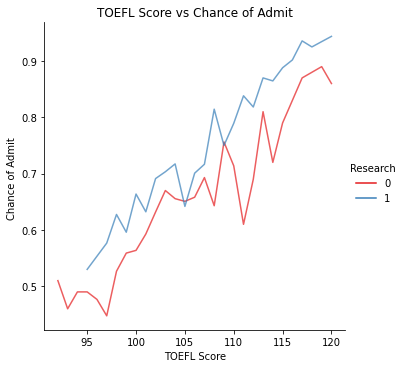

In [45]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

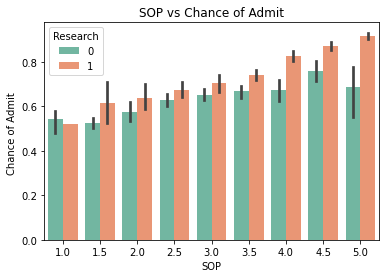

In [46]:
sns.barplot(data=df,x="SOP",y="Chance of Admit ",
            palette="Set2",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

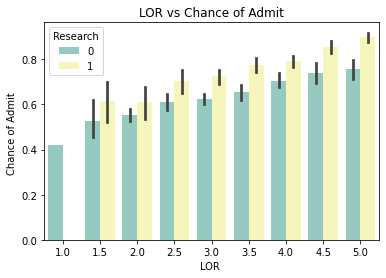

In [47]:
sns.barplot(data=df,x="LOR ",y="Chance of Admit ",
            palette="Set3",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

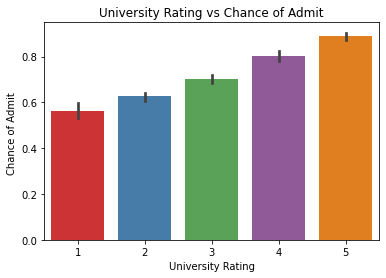

In [48]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit ",
            palette="Set1")
plt.title("University Rating vs Chance of Admit")
plt.show()

It was said that there are direct proportions between the columns and "Chance of Admit" data. Also, when observing the graphs, there are linear relationships between them. Therefore, using Linear Regression method may be suitable on the data, but since "Chance of Admit" data depends on more than one varible, it is more appropriate to imply Multiple Linear Regression method instead of Linear Regression method.

## Importing the required libraries for regression analyzes

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## Spliting the dataset into training and testing data

In [50]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]]
y = df["Chance of Admit "].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## MULTIPLE LINEAR REGRESSION

In [51]:
#implying multiple linear regression and determining its score

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))


Mutiple Linear Regression's Score = 0.819


## DECISION TREE REGRESSION

In [52]:
#implying decision tree regression and determining its score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.565


## RANDOM FOREST REGRESSION

In [53]:
#implying random forest regression and determining its score

ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.787


## CONCLUSION

R^2 score is an indicator of accuracy of Regression Models, and the accuracy is measured as close to 1 of this value. Therefore, as seen, Multiple Linear Regression Model is better than Decision Tree Regression and Random Forest Regression on this dataset when comparing their R^2 scores.

In [54]:
!pip install ibm_watson_machine_learning

## ESTABLISHING CONNECTION TO IBM WATSON ML SERVICE

In [55]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "<Your API key>"
}

client = APIClient(wml_credentials)

## CREATING DEPLOYMENT SPACE

In [56]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [57]:
space_uid = guid_from_space_name(client, 'Regression-Models')
print("Space UID = " + space_uid)

Space UID = a5d3879c-fce2-421a-a352-9e2bbb589332


In [58]:
client.set.default_space(space_uid)

'SUCCESS'

In [59]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

## PERSISTING THE MULTIPLE LINEAR REGRESSION MODEL AND DEPLOYING IT IN IBM CLOUD

In [60]:
#Set Python Version
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [61]:
model_details = client.repository.store_model(model = multiple_lin_reg, meta_props={
    client.repository.ModelMetaNames.NAME: "UAEP_Multiple_Linear_Regression",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
)

model_id = client.repository.get_model_id(model_details)

In [62]:
model_id

'8083e827-e81f-40d1-84ab-20d511771869'

## Testing

In [34]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
249,321,111,3,3.5,4.0,8.83
433,316,111,4,4.0,5.0,8.54
19,303,102,3,3.5,3.0,8.50
322,314,107,2,2.5,4.0,8.27
332,308,106,3,3.5,2.5,8.21
...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18
270,306,105,2,2.5,3.0,8.22
348,302,99,1,2.0,2.0,7.25
435,309,105,2,2.5,4.0,7.68


In [36]:
multiple_lin_reg.predict(x_train)

array([[0.78452564],
       [0.75876324],
       [0.64981017],
       [0.68306325],
       [0.63503516],
       [0.56210158],
       [0.73893939],
       [0.79922576],
       [0.61772725],
       [0.69935177],
       [0.63731158],
       [0.95350643],
       [0.84155526],
       [0.97261308],
       [0.46824721],
       [0.8108055 ],
       [0.68040556],
       [0.88463178],
       [0.49097611],
       [0.67130182],
       [0.72944068],
       [0.88320461],
       [0.713287  ],
       [0.76639103],
       [0.68182838],
       [0.69961517],
       [0.58225445],
       [0.99253539],
       [0.83521168],
       [0.5140217 ],
       [0.72107234],
       [0.73687811],
       [0.83662906],
       [0.52331071],
       [0.821924  ],
       [0.50467988],
       [0.81795845],
       [0.96184185],
       [0.65432536],
       [0.68963298],
       [0.81432035],
       [0.62427772],
       [0.81414702],
       [0.5348331 ],
       [0.94850501],
       [0.66456131],
       [0.96389496],
       [0.800

## UAEP Multiple Linear Regression Model Deployment Test

In [79]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "<Your API Key>"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]], "values": [[326, 110, 2, 3.5, 4, 9.23, 1]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/uaep_deployment/predictions?version=2022-11-12', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[[0.8448151378927107]]]}]}


In [91]:
probability = response_scoring.json()['predictions'][0]['values'][0][0][0]
probability

0.8448151378927107